In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Create Pipeline

In [2]:
from PynPoint2 import Pypeline

pipeline = Pypeline("/Users/markusbonse/Desktop/Workplace_wv",
                    "/Users/markusbonse/Desktop",
                    "/Users/markusbonse/Desktop/Results_ADI_wv")

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [133]:
from PynPoint2 import Pypeline

pipeline = Pypeline("/Users/markusbonse/Desktop/Workplace_no_wv",
                    "/Users/markusbonse/Desktop",
                    "/Users/markusbonse/Desktop/Results_ADI_no_wv")

## Create Data Port

In [144]:
from PynPoint2.core import InputPort

data_port = InputPort("09_star_arr_shifted_01",
                     pipeline.m_data_storage)

In [3]:
from PynPoint2.core import InputPort

data_port = InputPort("10_wavelet_denoised_soft_01",
                     pipeline.m_data_storage)

## Get Planet line

In [175]:
planet_line = data_port[:,67, 59]

## Plot Density

In [176]:
from sklearn.neighbors import KernelDensity

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [177]:
%matplotlib nbagg    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV

# The grid we'll use for plotting
x_grid = np.linspace(-400, 400, 1000)

# estimate bandwidth
'''
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.2, 40.0, 10)},
                    cv=5)
grid.fit(planet_line[:, None])

print grid.best_params_['bandwidth']
'''

pdf = kde_sklearn(planet_line,
                  x_grid,
                  bandwidth=3.5)

In [178]:
from sklearn import mixture
import numpy as np

gmm = mixture.GaussianMixture(n_init=1,n_components=2, covariance_type='full').fit(np.reshape(planet_line, (-1, 1)))

print zip(gmm.means_, gmm.covariances_)
gaussians = zip(gmm.means_, gmm.covariances_, gmm.weights_ )

[(array([ 7.20959823]), array([[ 396.20710348]])), (array([ 9.1092781]), array([[ 99.58951202]]))]


6.46847605375


<IPython.core.display.Javascript object>


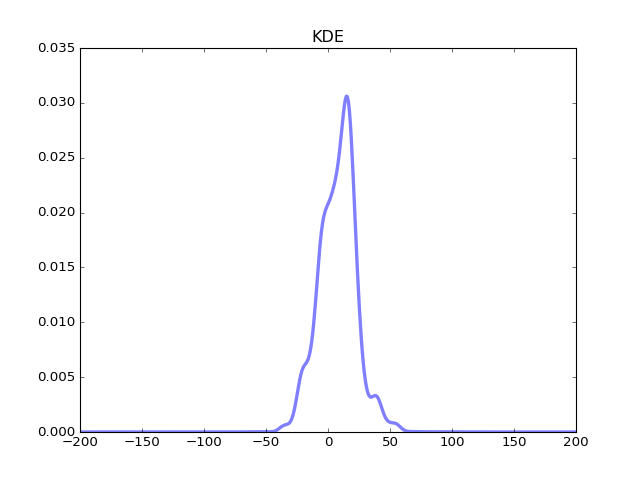

In [179]:
import scipy.stats as stats
import matplotlib.mlab as mlab

x = x_grid

'''
for gauss in gaussians:
    plt.plot(x,mlab.normpdf(x, gauss[0][0], np.sqrt(gauss[1][0]))*gauss[2])'''


from skimage.filters import threshold_otsu

print threshold_otsu(planet_line, nbins=10000)

plt.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
plt.title("KDE")
plt.xlim(-200, 200)
plt.show()

In [171]:
print x_grid[np.argsort(pdf)[-1]]
print np.mean(planet_line)
print np.median(planet_line)

12.4124124124
8.21524962227
8.4421094812


## Detect peaks

In [172]:
from PynPoint2.util import detect_peaks

<IPython.core.display.Javascript object>


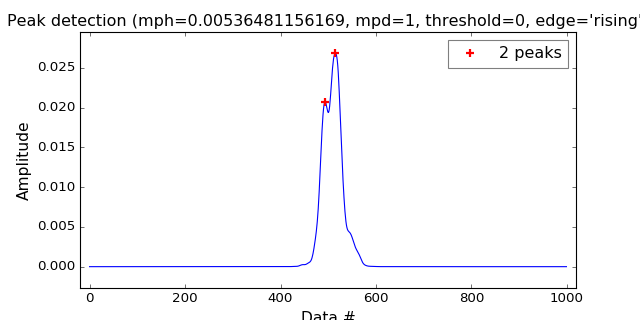

[ -5.20520521  12.41241241]


In [173]:
# detect all peaks and plot data
ind = detect_peaks(pdf,mph=np.max(pdf)/5., show=True)
print(x_grid[ind])

<IPython.core.display.Javascript object>


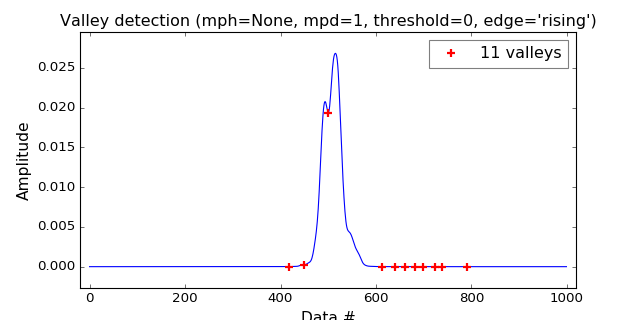

[ -66.06606607  -39.63963964    0.4004004    90.09009009  111.71171171
  128.52852853  145.34534535  159.75975976  179.77977978  190.99099099
  233.43343343]


In [174]:
ind = detect_peaks(pdf, valley = True, show=True)
print(x_grid[ind])